In [1]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd

In [8]:
tunnel = pd.read_csv("data/tunnel.csv", parse_dates=["Day"])
#tunnel = pd.read_csv("data/SimulatedSales.csv.zip")

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

In [10]:
#tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [11]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [7]:
df.values

array([[    0,  4266,    85, ...,     0,     0,     1],
       [    1,  3478,    85, ...,     0,     0,     0],
       [    2,  4469,    85, ...,     0,     0,     0],
       ...,
       [  781, 11610,  1164, ...,     0,     0,     1],
       [  782, 11020,  1164, ...,     0,     0,     1],
       [  783, 11675,  1164, ...,     0,     0,     1]])

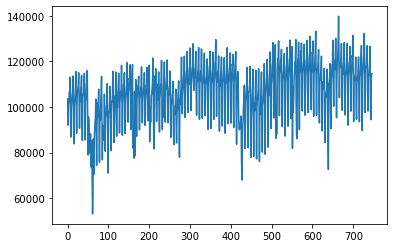

In [6]:
pl.plot(df.values[:,1])

In [13]:
df.index

DatetimeIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
               '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
               '2003-11-09', '2003-11-10',
               ...
               '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
               '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
               '2005-11-15', '2005-11-16'],
              dtype='datetime64[ns]', name='Day', length=747, freq=None)

In [14]:
train = df[df.index < pd.to_datetime("2005-07-01", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2005-07-01", format='%Y-%m-%d')]

In [8]:
train.index

DatetimeIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
               '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
               '2003-11-09', '2003-11-10',
               ...
               '2005-06-21', '2005-06-22', '2005-06-23', '2005-06-24',
               '2005-06-25', '2005-06-26', '2005-06-27', '2005-06-28',
               '2005-06-29', '2005-06-30'],
              dtype='datetime64[ns]', name='Day', length=608, freq=None)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


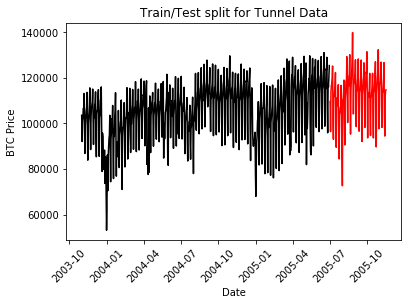

In [15]:
pl.plot(train.index,train.values[:,0], color = "black")
pl.plot(test.index,test.values[:,0], color = "red")
pl.ylabel('BTC Price')
pl.xlabel('Date')
pl.xticks(rotation=45)
pl.title("Train/Test split for Tunnel Data")
pl.show()

In [16]:
from sklearn.linear_model import LinearRegression

# Training data
X = train.loc[:, ['Time']]  # features
y = train.loc[:, 'NumVehicles']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


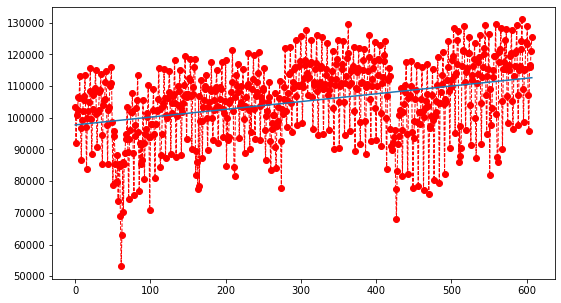

In [17]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y,'r--o',lw=1)
pl.plot(X.values,y_pred)
#pl.xlim(100,200)

In [18]:
train['Lag_1'] = train['NumVehicles'].shift(1)
train.head()

<ipython-input-18-a6e8a5ad514c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Lag_1'] = train['NumVehicles'].shift(1)


,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [22]:
test['Lag_1'] = test['NumVehicles'].shift(1)
train.head()

<ipython-input-22-fc2928907350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag_1'] = test['NumVehicles'].shift(1)


,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [19]:
from sklearn.linear_model import LinearRegression

X = train.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = train.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred_ = pd.Series(model.predict(X), index=X.index)

In [30]:
X.values

array([[103536.],
       [ 92051.],
       [100795.],
       [102352.],
       [106569.],
       [106284.],
       [113111.],
       [ 96806.],
       [ 86811.],
       [ 99194.],
       [102253.],
       [105707.],
       [107011.],
       [113588.],
       [ 97066.],
       [ 83848.],
       [ 99770.],
       [102281.],
       [104951.],
       [108397.],
       [115567.],
       [ 99758.],
       [ 88487.],
       [102773.],
       [107040.],
       [108092.],
       [109490.],
       [115048.],
       [101161.],
       [ 90733.],
       [101716.],
       [102497.],
       [108085.],
       [108811.],
       [113805.],
       [ 94656.],
       [ 85336.],
       [104140.],
       [105500.],
       [106046.],
       [111200.],
       [114801.],
       [ 97659.],
       [ 85532.],
       [102585.],
       [103496.],
       [110116.],
       [110804.],
       [115991.],
       [ 98807.],
       [ 78903.],
       [ 95771.],
       [ 94262.],
       [ 85453.],
       [ 79812.],
       [ 7

In [28]:
y.head(10)

Day
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
2003-11-06    106284
2003-11-07    113111
2003-11-08     96806
2003-11-09     86811
2003-11-10     99194
2003-11-11    102253
Name: NumVehicles, dtype: int64

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


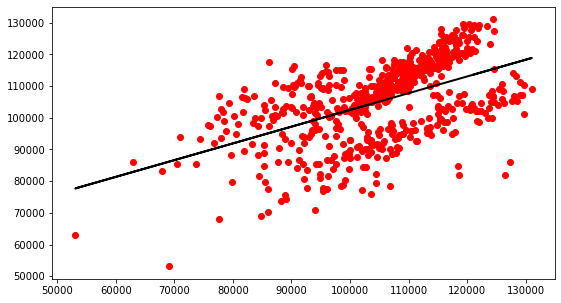

In [20]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y.values,"ro")
pl.plot(X.values,y_pred_,"k-",lw=2)

In [23]:
#predict test values

X_test = test.loc[:, ['Lag_1']]
X_test.dropna(inplace=True)  # drop missing values in the feature set
y_test = test.loc[:, 'NumVehicles']  # create the target
y_test, X_test = y_test.align(X_test, join='inner')  # drop corresponding values in target

In [24]:
y_pred_test = pd.Series(model.predict(X_test), index=X_test.index)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


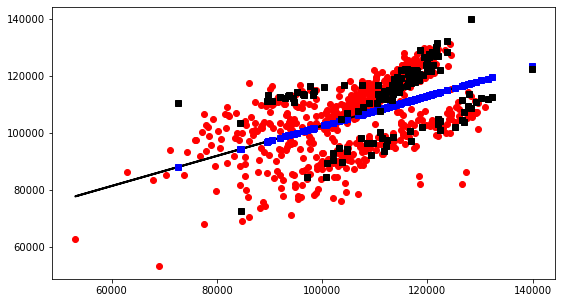

In [25]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y.values,"ro")
pl.plot(X.values,y_pred_,"k-",lw=2)
pl.plot(X_test.values,y_pred_test,"bs")
pl.plot(X_test.values,y_test,"ks")

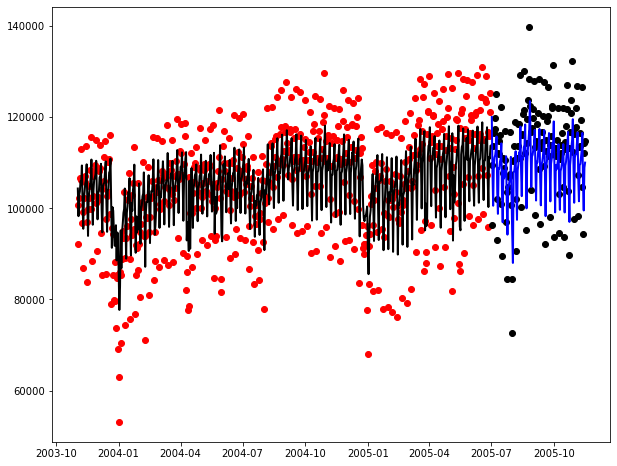

In [71]:
pl.figure(figsize=(10,8))

pl.plot(y,"ro")
pl.plot(y_pred_,"k-",lw=2)
pl.plot(y_test,"ko")
pl.plot(y_pred_test,"b-",lw=2)

In [26]:
#compute accuracy on the train and test set

acc_train = np.linalg.norm(y_pred_-y)/y.values.shape[0]
acc_test = np.linalg.norm(y_pred_test-y_test)/y_test.values.shape[0]

print(acc_train)
print(acc_test)

426.31930165741403
917.9265621496112


In [34]:
#predict values in the future 

X_test.iloc[-1].values.reshape(1,1)

array([[114296.]])

In [35]:
model.predict(X_test.iloc[-1].values.reshape(1,1))

array([110016.1154307])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


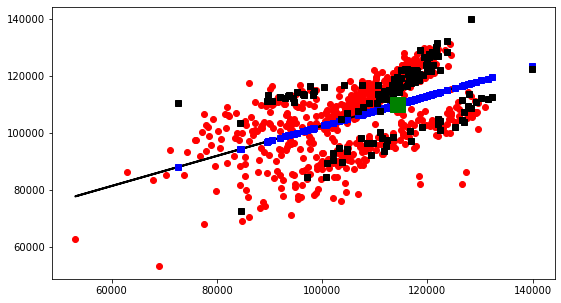

In [46]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y.values,"ro")
pl.plot(X.values,y_pred_,"k-",lw=2)
pl.plot(X_test.values,y_pred_test,"bs")
pl.plot(X_test.values,y_test,"ks")

pl.plot(X_test.iloc[-1].values.reshape(1,1),model.predict(X_test.iloc[-1].values.reshape(1,1)),"gs",ms=15)

In [39]:
prediction_time_span = 1

pred = []
t0 = X_test.iloc[-1].values.reshape(1,1)

for i in range(prediction_time_span):
    
    prediction = model.predict(t0)
    pred.append(prediction)
    t0 = prediction.reshape(1,1)
    

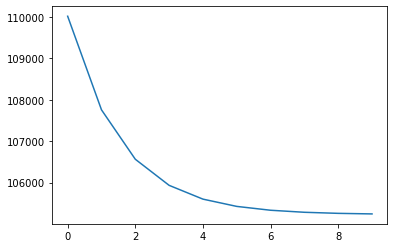

In [38]:
pl.plot(pred)